# Linear regressior

In [2]:
# Python imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(seed=1)

# Generating linear data

In [3]:
x = np.random.uniform(0, 1, 20)

def f(x):
    return x * 2

noise_variance = 0.2
noise = np.random.randn(x.shape[0]) * noise_variance

t = f(x) + noise

### Plot the values to visualize

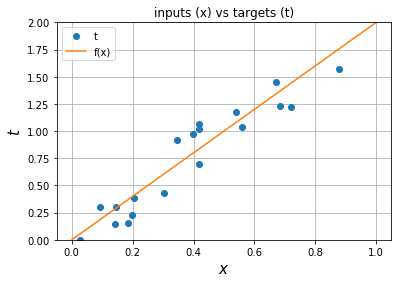

In [11]:
plt.plot(x, t, 'o', label='t')

# plot the initail line
plt.plot([0, 1], [f(0), f(1)], label='f(x)')

plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.title('inputs (x) vs targets (t)')
plt.grid()

# Setting y axis range
plt.ylim([0,2])
plt.legend(loc=2)
# Plot the initial values
plt.show()

# Defining the cost function

In [ ]:
# Defining the neural network function
def nn(x, w):
    return x * w

# Defining the cost function
def cost(y, t):
    return((t - y)**2)